In [2]:
import pandas as pd
import os

In [3]:
def list_csv_files(directory):
    # List to hold csv file names
    csv_files = []
    
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        # Check if the file is a CSV
        if filename.endswith('.csv'):
            csv_files.append(filename)
    
    return csv_files


folder_path = '/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data'
csv_files = list_csv_files("/Users/rachels/Desktop/NUS/Y4/dsa4266/Phishing data")
csv_files

['Nazario_5.csv',
 'Nigerian_Fraud.csv',
 'Ling.csv',
 'TREC_05.csv',
 'TREC_06.csv',
 'TREC_07.csv',
 'Nazario.csv',
 'SpamAssasin.csv',
 'CEAS_08.csv',
 'Nigerian_5.csv',
 'Enron.csv']

In [4]:
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    print(file)
    print(df.shape)
    print(df.columns)
    # print(df.head(1))

Nazario_5.csv
(3065, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_Fraud.csv
(3332, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
Ling.csv
(2859, 3)
Index(['subject', 'body', 'label'], dtype='object')
Nazario.csv
(1565, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')
SpamAssasin.csv
(5809, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
CEAS_08.csv
(39154, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')
Nigerian_5.csv
(6331, 7)
Index(['sender', 'receiver', 'date', 'subject', 'body', 'label', 'urls'], dtype='object')


/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/4199423972.py:5: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

Enron.csv
(49152, 423)
Index(['subject', 'body', 'label', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 413', 'Unnamed: 414', 'Unnamed: 415', 'Unnamed: 416',
       'Unnamed: 417', 'Unnamed: 418', 'Unnamed: 419', 'Unnamed: 420',
       'Unnamed: 421', 'Unnamed: 422'],
      dtype='object', length=423)


In [5]:
# combine all the datasets into one
combined = []
for file in csv_files:
    if 'TREC' in file:
        continue
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    if df.shape[1] == 7:
        df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
        combined.append(df)

df = pd.read_csv(os.path.join(folder_path, 'TREC_07.csv')) 
df = df[['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']]
combined.append(df)
combined_df = pd.concat(combined, ignore_index=True)

/var/folders/r7/7xn5t9gj65x3tw58b7rmvtmm0000gn/T/ipykernel_13860/1916306475.py:7: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,2

In [6]:
combined_df = pd.concat(combined, ignore_index=True)
combined_df.head()
combined_df.columns

Index(['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label'], dtype='object')

### Feature Engineering

Feature Engineering for body

In [7]:
from bs4 import BeautifulSoup  
import re
from collections import Counter

# Counts the number of characters in a given string
def count_characters(string):
    return len(string) - string.count(' ') - string.count('\n')

# Integer: number of words in the body
def body_noWords(body_content):
    body_noWords = len(body_content.split())
    return body_noWords

# Integer: number of characters in the body
def body_noCharacters(body_content):
    body_noCharacters = count_characters(body_content)
    return body_noCharacters

# Integer: number of distinct words in the body
def body_noDistinctWords(body_content):
    body_noDistinctWords = len(Counter(body_content.split()))
    return body_noDistinctWords

# Float: richness of the text (body)
def body_richness(body_noWords, body_noCharacters):
    try:
        body_richness = float(body_noWords)/body_noCharacters
    except:
        body_richness = 0
    return body_richness

# Integer: number of function words in the body
def body_noFunctionWords(body_content):
    body_noFunctionWords = 0
    wordlist = re.sub("[^A-Za-z]", " ", body_content.strip()).lower().split()
    function_words = ["account", "access", "bank", "credit", "click", "identity", "inconvenience", "information", "limited", 
                      "log", "minutes", "password", "recently", "risk", "social", "security", "service", "suspended"]
    for word in function_words:
        body_noFunctionWords += wordlist.count(word)
    return body_noFunctionWords


In [8]:
# Run the function to extract attributes from the mail body
def extract_body_attributes(df):    
    df['body_noWords'] = df['body'].apply(body_noWords)
    df['body_noCharacters'] = df['body'].apply(body_noCharacters) 
    df['body_noDistinctWords'] = df['body'].apply(body_noDistinctWords)
    df['body_richness'] = df.apply(lambda row: body_richness(row['body_noWords'], row['body_noCharacters']), axis=1)
    df['body_noFunctionWords'] = df['body'].apply(body_noFunctionWords)
    return df

combined_df['body'] = combined_df['body'].fillna("")
combined_df = extract_body_attributes(combined_df)

Feature Engineering for Subject

In [9]:
'''
Functions to extract subject line based attributes
'''
# Boolean: Check if the email is a reply to any previous mail
def subj_reply(subj_content):
    subj_reply = subj_content.lower().startswith("re:")
    return subj_reply

# Boolean: Check if the email is a forward from another mail
def subj_forward(subj_content):
    subj_forward = subj_content.lower().startswith("fwd:")
    return subj_forward

# Integer: number of words in the subject
def subj_noWords(subj_content):
    subj_noWords = len(subj_content.split())
    return subj_noWords

# Integer: number of characters in the subject
def subj_noCharacters(subj_content):
    subj_noCharacters = count_characters(subj_content)
    return subj_noCharacters

# Float: richness of the text (subject)
def subj_richness(subj_noWords, subj_noCharacters):
    try:
        subj_richness = float(subj_noWords)/subj_noCharacters
    except:
        subj_richness = 0
    return subj_richness


In [10]:
'''
Extract subject line based attributes
'''

# Run the function to extract attributes from the mail subject line
def extract_subj_attributes(df):
    
    df['subj_reply'] = df['subject'].apply(subj_reply) 
    df['subj_forward'] = df['subject'].apply(subj_forward)
    df['subj_noWords'] = df['subject'].apply(subj_noWords)
    df['subj_noCharacters'] = df['subject'].apply(subj_noCharacters)
    df['subj_richness'] = df.apply(lambda row: subj_richness(row['subj_noWords'], row['subj_noCharacters']), axis=1)
    return df

combined_df['subject'] = combined_df['subject'].fillna("")
combined_df = extract_subj_attributes(combined_df)

Feature extraction from date

In [87]:
# Check for missing values
print(combined_df.isnull().sum())

# NAs for these
# sender                   671
# receiver                3884
# date                     999


sender                   671
receiver                3884
date                    3824
subject                    0
body                       0
urls                       0
label                      0
body_noWords               0
body_noCharacters          0
body_noDistinctWords       0
body_richness              0
body_noFunctionWords       0
subj_reply                 0
subj_forward               0
subj_noWords               0
subj_noCharacters          0
subj_richness              0
dtype: int64


In [88]:
# Display rows where 'sender', 'receiver', or 'date' columns have NaN values
missing_rows = combined_df[combined_df[['sender', 'receiver', 'date']].isna().any(axis=1)]

# Display the missing rows
print(missing_rows)

                                                   sender receiver  \
126             Teresa Knight <Teresa.Knight@nesanet.org>      NaN   
212                  "Smith, Mark" <Mark.Smith@ENRON.com>      NaN   
300                            jhpb@sarto.budd-lake.nj.us      NaN   
350                                         cnews@umr.edu      NaN   
361                         jhpb@sarto.gaithersburg.md.us      NaN   
...                                                   ...      ...   
112770                        Mclaughlin3Bond@caslink.com      NaN   
112829                      Goddard2Bradford@lanminds.com      NaN   
112927                       Sherman2Webster@dpsworld.com      NaN   
112943  MR WILLIAMS SMITH SMITH <w.smith_g18@hotmail.com>      NaN   
112999                      TrevorAQRISimpson@inreach.com      NaN   

                             date  \
126     2001-07-09 10:12:00-05:00   
212     2001-07-11 17:25:03-05:00   
300     1992-07-28 03:13:55+00:00   
350     199

In [17]:
# for now, drop the na, until someone has a better idea
df_cleaned = test_df.dropna(subset=['sender', 'receiver', 'date'])

In [78]:
numerical_df_integers = df_cleaned.select_dtypes(include=['int'])

## Start from here

In [121]:
df = pd.read_csv("~/Desktop/NUS/Y4/DSA4266/Phishing data/combined_data.csv",  lineterminator='\n')

,sender,receiver,date,subject,body,urls,label,date_day_of_month,date_month,date_day_of_week,...,body_question_count,body_special_char_count,body_sentiment_polarity,body_sentiment_subjectivity,body_url_count,body_shortened_url_count,body_spam_count,send_word_count,send_char_count,send_diffSenderReceiver
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...",2001-06-29 13:36:09+00:00,"FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,1,0,1.716586,-0.236286,0.841049,...,-0.147795,0.016977,-0.429447,-0.103010,5.549797,-0.033984,1.114837,0.130862,-0.456875,0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>",2001-06-29 14:37:04+00:00,NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,0,1.716586,-0.236286,0.841049,...,-0.147795,-0.034013,-0.372119,-0.262059,-0.229612,-0.033984,-0.112199,0.130862,-0.646715,0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>",2001-06-29 13:39:30+00:00,RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,1,0,1.716586,-0.236286,0.841049,...,-0.045015,-0.034013,-0.425052,-0.761393,0.193271,-0.033984,-0.248537,0.130862,-0.267036,0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...",2001-06-29 15:35:17+00:00,FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,0,1.716586,-0.236286,0.841049,...,-0.045015,-0.014892,-0.379502,-0.272873,-0.229612,-0.033984,0.160475,0.130862,-0.077196,0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...",2001-06-29 15:40:02+00:00,New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,0,1.716586,-0.236286,0.841049,...,-0.147795,-0.034013,-0.025963,-0.612002,-0.229612,-0.033984,-0.248537,2.471773,1.726279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178959,Gregory Alan Bolcer <gbolcer@endeavors.com>,fork@spamassassin.taint.org,2002-09-17 13:50:20+00:00,Re: RSA (repost),"""Adam L. Beberg"" wrote:\n> \n> So, who has don...",1,0,0.332750,0.836145,-0.942045,...,-0.045015,-0.014892,0.166602,-0.164679,0.193271,0.248072,2.614549,1.301318,0.397402,1
178960,Rodent of Unusual Size <Ken.Coar@Golux.Com>,Flatware or Road Kill? <FoRK@xent.com>,2002-09-17 14:18:44+00:00,Harvest Moon,http://spineless.org/~mod/pix/octoberMoon.jpg\...,1,0,0.332750,0.836145,-0.942045,...,-0.147795,-0.027639,-0.765636,-2.246037,0.193271,-0.033984,-0.248537,2.471773,0.397402,1
178961,yyyy@spamassassin.taint.org (Justin Mason),Gary Lawrence Murphy <garym@canada.com>,2002-09-17 16:50:23+00:00,Re: Slaughter in the Name of God,"Gary Lawrence Murphy said: > >>>>> ""S"" == Step...",0,0,0.332750,0.836145,-0.942045,...,0.057766,-0.034013,-0.341501,0.271745,-0.229612,-0.033984,0.024138,0.130862,0.302483,1
178962,<michael@i-magery.com>,<fork@spamassassin.taint.org>,2002-09-17 17:41:50+00:00,FW: Wanna buy a nuke?,I have been told to take anything read in Prav...,1,0,0.332750,0.836145,-0.942045,...,-0.045015,-0.008518,1.480793,0.789177,0.052310,-0.033984,-0.248537,-2.210049,-1.595912,1


In [3]:
import pandas as pd
df = pd.read_csv("~/Desktop/NUS/Y4/DSA4266/Phishing data/combined_data.csv",  lineterminator='\n')
df.head()

,sender,receiver,date,subject,body,urls,label,date_day_of_month,date_month,date_day_of_week,...,body_question_count,body_special_char_count,body_sentiment_polarity,body_sentiment_subjectivity,body_url_count,body_shortened_url_count,body_spam_count,send_word_count,send_char_count,send_diffSenderReceiver
0,"""Hu, Sylvia"" <Sylvia.Hu@ENRON.com>","""Acevedo, Felecia"" <Felecia.Acevedo@ENRON.com>...",2001-06-29 13:36:09+00:00,"FW: June 29 -- BNA, Inc. Daily Labor Report",User ID: enrondlr\nPW: bnaweb22\n\n\n ...,1,0,1.725612,-0.235795,0.845494,...,-0.148146,0.016733,-0.430243,-0.108630,5.465202,-0.033873,1.198552,0.12592,-0.467380,0
1,"""Webb, Jay"" <Jay.Webb@ENRON.com>","""Lambie, Chris"" <Chris.Lambie@ENRON.com>",2001-06-29 14:37:04+00:00,NGX failover plan.,"\nHi Chris, \n\nTonight we are rolling out a ...",0,0,1.725612,-0.235795,0.845494,...,-0.148146,-0.033274,-0.373288,-0.267096,-0.231379,-0.033873,-0.095955,0.12592,-0.657927,0
2,"""Symms, Mark"" <Mark.Symms@ENRON.com>","""Thomas, Paul D."" <Paul.D.Thomas@ENRON.com>",2001-06-29 13:39:30+00:00,RE: Intranet Site,Rika r these new?\n\n -----Original Message---...,1,0,1.725612,-0.235795,0.845494,...,-0.047293,-0.033274,-0.425876,-0.764598,0.185444,-0.033873,-0.239789,0.12592,-0.276833,0
3,"""Thorne, Judy"" <Judy.Thorne@ENRON.com>","""Grass, John"" <John.Grass@ENRON.com>, ""Nemec, ...",2001-06-29 15:35:17+00:00,FW: ENA Upstream Company information,"John/Gerald,\n\nWe are currently trading under...",0,0,1.725612,-0.235795,0.845494,...,-0.047293,-0.014521,-0.380623,-0.277870,-0.231379,-0.033873,0.191713,0.12592,-0.086286,0
4,"""Williams, Jason R (Credit)"" <Jason.R.Williams...","""Nemec, Gerald"" <Gerald.Nemec@ENRON.com>, ""Dic...",2001-06-29 15:40:02+00:00,New Master Physical,Gerald and Stacy -\n\nAttached is a worksheet ...,0,0,1.725612,-0.235795,0.845494,...,-0.148146,-0.033274,-0.029388,-0.615755,-0.231379,-0.033873,-0.239789,2.48685,1.723908,0


In [12]:
df.shape

(171961, 34)

### Autoencoder

In [26]:
from sklearn.model_selection import train_test_split
# Step 3: Split the dataset into training and testing sets
X = df.drop(columns=['label', 'sender', 'receiver', 'date', 'subject', 'body'])  # Features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 1.0628 - val_loss: 0.9703
Epoch 2/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.7841 - val_loss: 0.8495
Epoch 3/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.6999 - val_loss: 0.7880
Epoch 4/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.5702 - val_loss: 0.7562
Epoch 5/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.7915 - val_loss: 0.7395
Epoch 6/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.8763 - val_loss: 0.7303
Epoch 7/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.5911 - val_loss: 0.7260
Epoch 8/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.5017 - val_loss: 0.7241
Epoch 9/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.6313 - val_loss: 0.7216
Epoch 10/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - loss: 0.6937 - val_loss: 0.7210
Epoch 11/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.7027 - val_loss: 0.7207
Epoch 12

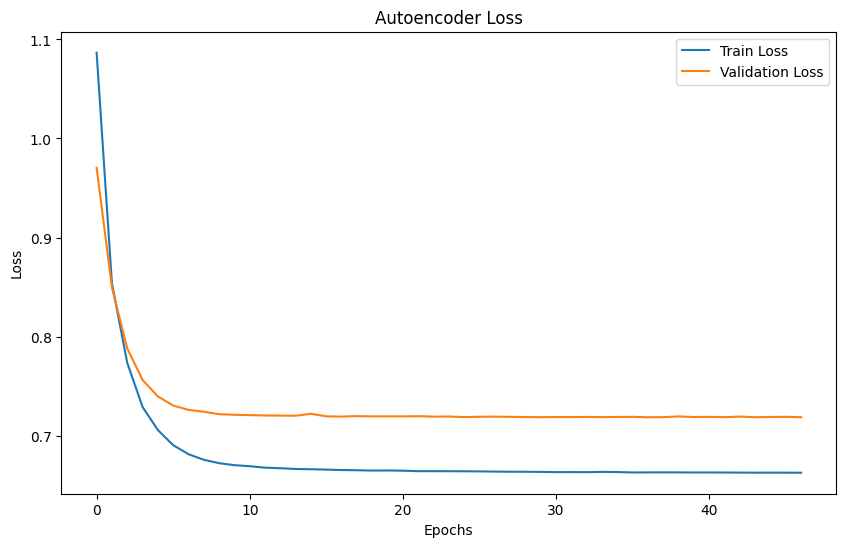

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization


# Step 4: Build the Autoencoder model
input_dim = X_train.shape[1]  # Number of features

# Define the encoder with L2 regularization and Dropout
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(input_layer)
encoded = BatchNormalization()(encoded)  # Add batch normalization
encoded = Dropout(0.3)(encoded)

encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(encoded)
encoded = BatchNormalization()(encoded)  # Add batch normalization
encoded = Dropout(0.3)(encoded)

latent_space = Dense(32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
latent_space = BatchNormalization()(latent_space)  # Add batch normalization

# Define the decoder with Batch Normalization and Dropout
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(latent_space)
decoded = BatchNormalization()(decoded)  # Add batch normalization
decoded = Dropout(0.3)(decoded)

decoded = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(decoded)
decoded = BatchNormalization()(decoded)  # Add batch normalization

output_layer = Dense(input_dim, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model with Mean Squared Error loss and Adam optimizer
autoencoder.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stopping])

# Evaluate the model
# autoencoder.evaluate(X_test, X_test)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1075/1075 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reconstruction Error: 109778    0.108158
50207     0.060979
42265     0.558361
77072     0.180490
126398    0.351269
            ...   
86877     0.159771
137542    0.734063
54684     0.330574
97871     0.459281
51157     0.091723
Length: 34393, dtype: float64
Accuracy: 0.5230134038903265
ROC-AUC: 0.4937447805946509
Confusion Matrix:
[[17291  1023]
 [15382   697]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68     18314
           1       0.41      0.04      0.08     16079

    accuracy                           0.52     34393
   macro avg       0.47      0.49      0.38     34393
weighted avg       0.47      0.52      0.40     34393



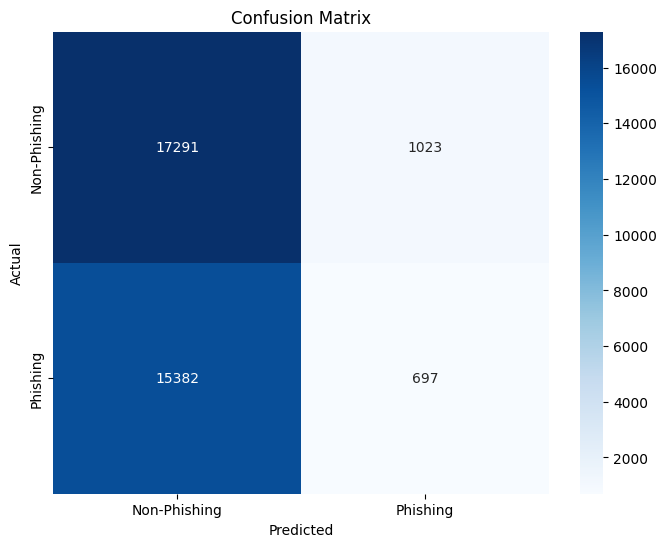

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import seaborn as sns

def evaluate_metrics(model, X_test):
    encoded_data = model.predict(X_test)
    reconstruction_error = np.mean(np.square(X_test - encoded_data), axis = 1)
    print(f'Reconstruction Error: {reconstruction_error}')
    # Accuracy, ROC-AUC, confusion metrics, precision 

    threshold = np.percentile(reconstruction_error, 95)  # Example threshold at the 95th percentile

    # Classify emails based on reconstruction error
    predictions = [1 if error > threshold else 0 for error in reconstruction_error]

    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)

    # Print the evaluation metrics
    print(f'Accuracy: {accuracy}')
    print(f'ROC-AUC: {roc_auc}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report) 

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Phishing', 'Phishing'], 
                yticklabels=['Non-Phishing', 'Phishing'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

evaluate_metrics(autoencoder, X_test)

### Tuning the Autoencoder

Trial 10 Complete [00h 10m 46s]
val_loss: 0.7138507962226868

Best val_loss So Far: 0.7132685780525208
Total elapsed time: 02h 06m 45s
Best Hyperparameters:
{'activation1': 'sigmoid', 'activation2': 'sigmoid', 'activation3': 'sigmoid', 'units1': 128, 'l2_reg': 0.005254388923785788, 'dropout1': 0.2, 'units2': 128, 'l2_reg2': 1.606120839072308e-05, 'dropout2': 0.30000000000000004, 'units3': 256, 'l2_reg3': 0.0013763964486821528, 'dropout3': 0.2, 'learning_rate': 3.3825960685398456e-05}
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


3440/3440 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 0.6315 - val_loss: 0.7134
Epoch 2/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.7492 - val_loss: 0.7131
Epoch 3/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.5051 - val_loss: 0.7131
Epoch 4/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.5016 - val_loss: 0.7132
Epoch 5/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.5189 - val_loss: 0.7131
Epoch 6/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.6625 - val_loss: 0.7131
Epoch 7/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.6256 - val_loss: 0.7130
Epoch 8/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.6072 - val_loss: 0.7131
Epoch 9/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.6073 - val_loss: 0.7130
Epoch 10/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.8726 - val_loss: 0.7128
Epoch 11/100
3440/3440 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - loss: 0.7944 - val_loss: 0.7129
Epoch 12/100
3440/34

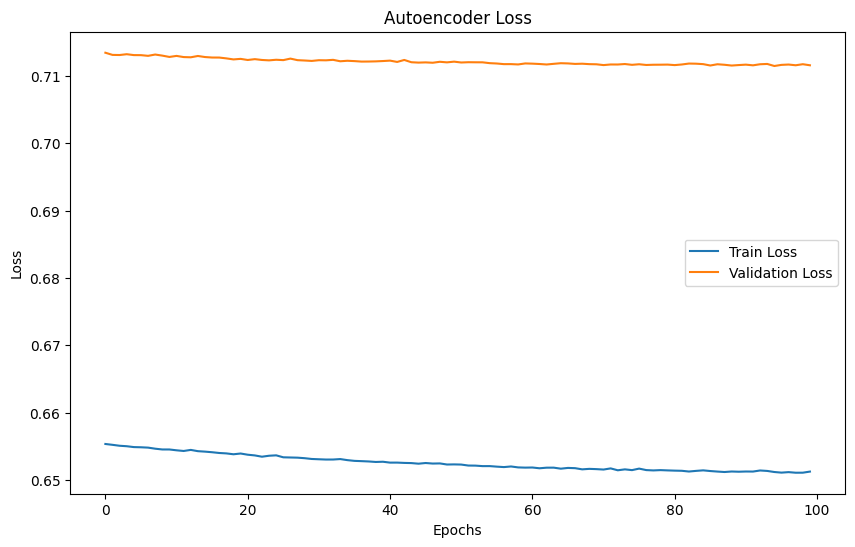

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization
from kerastuner import HyperModel, RandomSearch

# Step 1: Define a HyperModel class
class AutoencoderHyperModel(HyperModel):
    def build(self, hp):
        input_dim = X_train.shape[1]  # Number of features
        
        # Define the encoder
        input_layer = Input(shape=(input_dim,))
        
        # Choose activation functions from a list of options
        activation1 = hp.Choice('activation1', ['relu', 'tanh', 'sigmoid'])
        activation2 = hp.Choice('activation2', ['relu', 'tanh', 'sigmoid'])
        activation3 = hp.Choice('activation3', ['relu', 'tanh', 'sigmoid'])
        
        encoded = Dense(units=hp.Int('units1', min_value=64, max_value=256, step=64),
                        activation=activation1,
                        kernel_regularizer=l2(hp.Float('l2_reg', 1e-5, 1e-2, sampling='LOG')))(input_layer)
        encoded = BatchNormalization()(encoded)  # Add batch normalization
        encoded = Dropout(hp.Float('dropout1', 0.2, 0.5, step=0.1))(encoded)

        encoded = Dense(units=hp.Int('units2', min_value=32, max_value=128, step=32),
                        activation=activation2,
                        kernel_regularizer=l2(hp.Float('l2_reg2', 1e-5, 1e-2, sampling='LOG')))(encoded)
        encoded = BatchNormalization()(encoded)  # Add batch normalization
        encoded = Dropout(hp.Float('dropout2', 0.2, 0.5, step=0.1))(encoded)

        latent_space = Dense(units=32, activation='relu', kernel_regularizer=l2(0.001))(encoded)
        latent_space = BatchNormalization()(latent_space)  # Add batch normalization

        # Define the decoder
        decoded = Dense(units=hp.Int('units3', min_value=64, max_value=256, step=64),
                        activation=activation3,
                        kernel_regularizer=l2(hp.Float('l2_reg3', 1e-5, 1e-2, sampling='LOG')))(latent_space)
        decoded = BatchNormalization()(decoded)  # Add batch normalization
        decoded = Dropout(hp.Float('dropout3', 0.2, 0.5, step=0.1))(decoded)

        decoded = Dense(units=input_dim, activation='sigmoid')(decoded)

        # Define the autoencoder model
        autoencoder = Model(input_layer, decoded)

        # Compile the model
        autoencoder.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='LOG')), loss='mse')
        
        return autoencoder

# Step 2: Set up Keras Tuner
hypermodel = AutoencoderHyperModel()

tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=10,  # Number of different hyperparameter configurations to try
    executions_per_trial=1,
    directory='autoencoder_tuning',
    project_name='autoencoder_hyperparameter_tuning'
)

# Step 3: Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 4: Start the hyperparameter tuning process
tuner.search(X_train, X_train,
             epochs=50,
             batch_size=32,
             validation_split=0.2,
             callbacks=[early_stopping])

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Step 5: Fit the best model on the entire training data
history_tuned = best_model.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          validation_split=0.2,
                          callbacks=[early_stopping])

# Step 6: Evaluate the model on the testing set
test_loss = best_model.evaluate(X_test, X_test)
print(f'Test Loss: {test_loss}')

# Optional: Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history_tuned.history['loss'], label='Train Loss')
plt.plot(history_tuned.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


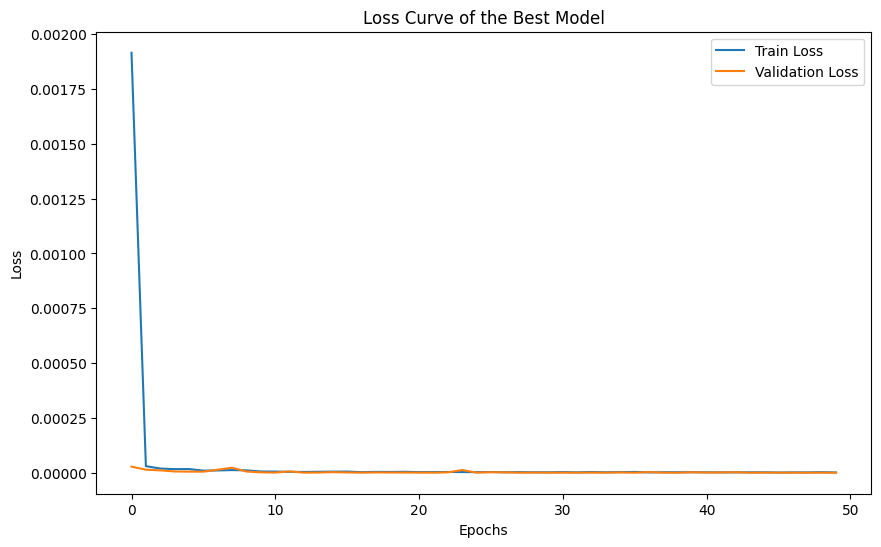

In [111]:
import matplotlib.pyplot as plt

def plot_loss_curve(history):
    # Plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve of the Model')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss_curve(history_tuned)

Evaluate Model

1075/1075 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Reconstruction Error: 109778    0.105600
50207     0.060966
42265     0.558289
77072     0.160463
126398    0.349276
            ...   
86877     0.155809
137542    0.725842
54684     0.305308
97871     0.455862
51157     0.091942
Length: 34393, dtype: float64
Accuracy: 0.5233041607303812
ROC-AUC: 0.4940367704905865
Confusion Matrix:
[[17296  1018]
 [15377   702]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.94      0.68     18314
           1       0.41      0.04      0.08     16079

    accuracy                           0.52     34393
   macro avg       0.47      0.49      0.38     34393
weighted avg       0.47      0.52      0.40     34393



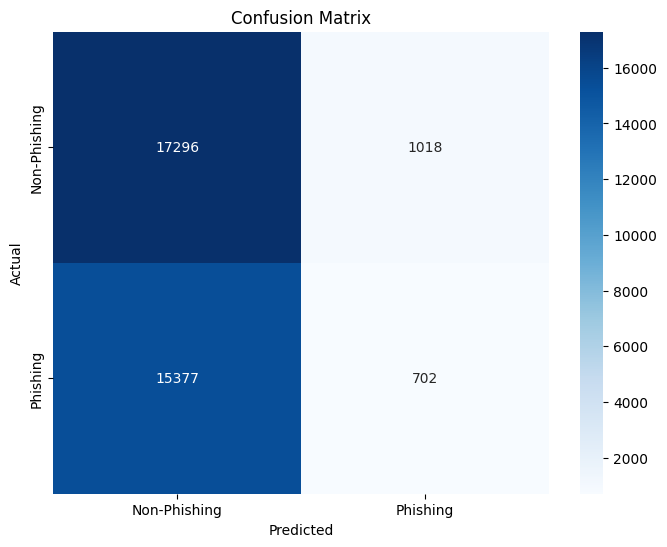

In [39]:
evaluate_metrics(best_model, X_test)